# Inverse Problems Exercises: 2024s s01 (all)
https://www.umm.uni-heidelberg.de/miism/

## Notes
* Please **DO NOT** change the name of the `.ipynb` file. 
* Please **DO NOT** import extra packages to solve the tasks. 
* Please put the `.ipynb` file directly into the `.zip` archive without any intermediate folder. 

## Please provide your personal information
* full name (Name): Quang Minh, Ngo

YOUR ANSWER HERE

## I05: Parabolic trajectory problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Forward problem
Assume that we observe a ball thrown perpendicular to the earth's
surface to the sky. By ignoring friction, we can write the equation of motion
as the height $g$ as a function of time $t$ as 
$$g_i = g(t_i) = f_0 + f_1 t_i + \frac{1}{2} f_2 t_i^2 = \begin{bmatrix} 1 & t_i & \frac{1}{2} t_i^2 \end{bmatrix} \begin{bmatrix} f_0 \\ f_1 \\ f_2 \end{bmatrix} .$$

* Given $f_\text{true} = \begin{bmatrix} f_0 \\ f_1 \\ f_2 \end{bmatrix} = \begin{bmatrix} 1 \\ 25 \\ -4 \end{bmatrix}$
* Given $t_i = (0.0, 0.5, 1.0, ..., 9.0, 9.5)$
* Calculate $g_i = g(t_i)$
* Save the output in the variables `f_true`, `t` and `g`, respectivly (as `numpy.array`)
* Plot `g` versus `t` in the axes `ax`

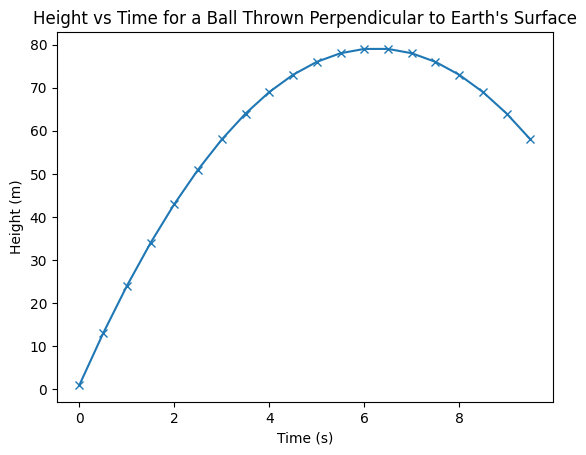

In [2]:
# YOUR CODE HERE

# Define the true function f_true(t) = 1 + 25t - 4t^2
f_true = np.array([1.0, 25.0, -4.0], dtype=float)

# Define the time vector t = [0, 0.5, 1.0, ..., 9.5, 10.0]
t = np.arange(0, 10, 0.5, dtype=float)

# Compute the true function values y = f_true(t)
g = np.dot(np.array([np.ones_like(t), t, 0.5*t**2], dtype=float).T, f_true)

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(t, g, marker='x', linestyle='-')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)')
ax.set_title('Height vs Time for a Ball Thrown Perpendicular to Earth\'s Surface')
plt.show()

In [3]:
# This cell contains hidden tests.



In [4]:
# This cell contains hidden tests.


### Inverse problem
Collecting all measurements, we obtain the system of equations
$$g = \begin{bmatrix} g_1 \\ ... \\ g_n \end{bmatrix}
= \begin{bmatrix} 1 & t_1 & \frac{1}{2} t_1^2 \\ ... & ... & ... \\ 1 & t_n & \frac{1}{2} t_n^2 \end{bmatrix}
\begin{bmatrix} f_0 \\ f_1 \\ f_2 \end{bmatrix}
= A f .$$
When the number of measurements is the same as the number of parameters, $A$ is square. The solution involves the inverse as 
$$\hat{f} = A^{-1} g .$$

* Take the last 3 elements from `t` and `g`
* Calculate $A$ and $\hat{f}$ 
* Save the output in the variables `A` and `f_est`, respectivly (as `numpy.array`)

In [5]:
# YOUR CODE HERE

# Take the last 3 elements of the time vector t
t_last = t[-3:]

# Take the last 3 elements of the true function values g
g_last = g[-3:]

# Calculate A
A = np.array([np.ones_like(t_last), t_last, 0.5*t_last**2], dtype=float).T

# Calculate f_est
f_est = np.array(np.linalg.inv(A) @ g_last, dtype=float)

In [6]:
# This cell contains tests.


print(A)
print(f_est)

[[ 1.     8.5   36.125]
 [ 1.     9.    40.5  ]
 [ 1.     9.5   45.125]]
[ 1. 25. -4.]


### Measurement errors
The real measurements usually contain noise. In the case of additive Gaussian noise, the problem is formulated as
$$g' = g + \epsilon = Af + \epsilon ,$$
where $\epsilon$ is a random variable with Gaussian distribution with mean $0$ and variance $\sigma^2$, i.e. $\epsilon \sim \mathcal{N}(0,\sigma^2)$. The solution involves the inverse as 
$$\hat{f} = A^{-1} g' .$$

* Given $\sigma = 2$
* Calculate $g'$
* Save the output in the variable `g_n` (as `numpy.array`)
* Plot `g` versus `t` in the axes `ax`
* Plot `g_n` versus `t` in the axes `ax` as well
* Show the legend in the axes `ax`
* Take the last 3 elements from `t` and `g_n`
* Calculate $A$ and $\hat{f}$ 
* Save the output in the variables `A` and `f_est`, respectivly (as `numpy.array`)

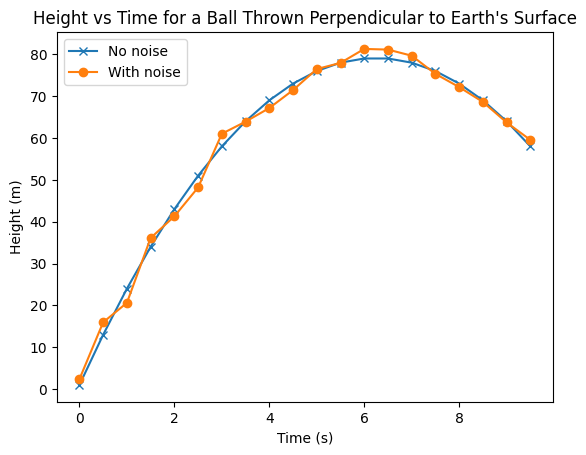

In [7]:
# YOUR CODE HERE

# Define sigma and epsilon
sigma = np.single(2)
epsilon = np.random.normal(0, sigma, size=len(g))

# Calculate g
g_n = np.array(g + epsilon, dtype=float)

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(t, g, marker='x', linestyle='-', label='No noise')
ax.plot(t, g_n, marker='o', linestyle='-', label='With noise')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)')
ax.set_title('Height vs Time for a Ball Thrown Perpendicular to Earth\'s Surface')
ax.legend()
plt.show()

# Take last 3 elements of t
t_last = t[-3:]

# Take last 3 elements of g_n
g_n_last = g_n[-3:]

# Calculate A
A = np.array([np.ones_like(t_last), t_last, 0.5*t_last**2], dtype=float).T

# Calculate f_est
f_est = np.array(np.linalg.inv(A) @ g_n_last, dtype=float)

In [8]:
# This cell contains hidden tests.


In [9]:
# This cell contains hidden tests.


In [10]:
# This cell contains tests.


print(f_est)

[263.29324727 -35.27654806   2.91128568]


### Question: Noise
* How does the result depend on the noise? 

YOUR ANSWER HERE
* When the noise level is higher, the accuracy of the $\hat{f}$  is lower (which means $\hat{f}$ and noise level are inversely proportional).
* This noise can mask the true signal in the data, therefore it is difficult to estimate the parameters correctly.

### Pseudo-inverse
When the number of measurements is larger than the number of parameters, $A$ is generally not invertible. The solution involves the pseudo-inverse as 
$$\hat{f} = (A^T A)^{-1} A^T g = A^{PI} g' .$$

* Take all elements from `t` and `g_n`
* Calculate $A$ and $\hat{f}$ 
* Save the output in the variables `A` and `f_est`, respectivly (as `numpy.array`)

In [11]:
# YOUR CODE HERE

# Calculate A
A = np.array([np.ones_like(t), t, 0.5*t**2], dtype=float).T

# Calculate f_est
f_est = np.array(np.linalg.inv(A.T @ A) @ A.T @ g_n, dtype=float)

In [12]:
# This cell contains tests.


print(A)
print(f_est)

[[ 1.     0.     0.   ]
 [ 1.     0.5    0.125]
 [ 1.     1.     0.5  ]
 [ 1.     1.5    1.125]
 [ 1.     2.     2.   ]
 [ 1.     2.5    3.125]
 [ 1.     3.     4.5  ]
 [ 1.     3.5    6.125]
 [ 1.     4.     8.   ]
 [ 1.     4.5   10.125]
 [ 1.     5.    12.5  ]
 [ 1.     5.5   15.125]
 [ 1.     6.    18.   ]
 [ 1.     6.5   21.125]
 [ 1.     7.    24.5  ]
 [ 1.     7.5   28.125]
 [ 1.     8.    32.   ]
 [ 1.     8.5   36.125]
 [ 1.     9.    40.5  ]
 [ 1.     9.5   45.125]]
[ 1.53615749 24.71267693 -3.93357438]


In [13]:
# This cell contains hidden tests.


### Question: Data
* How does the result depend on the number of considered data?

YOUR ANSWER HERE
* If we have more data than parameters, providing additional data would help refine the estimate of the parameters, improve the accuracy of the system, and reduce noise influence. This we call overdetermined system.
* If we have less data than parameters, providing addtional data would narrow down the possible solutions for the problem and then a unique and accurate answer could be found. This we call underdetermined system.